In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

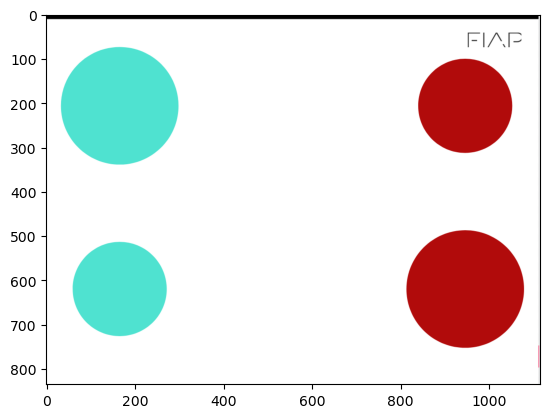

In [2]:
circulo = cv2.imread('circulo.png')

sw_circulo = cv2.cvtColor(circulo, cv2.COLOR_BGR2RGB)


plt.imshow(sw_circulo)
plt.show()

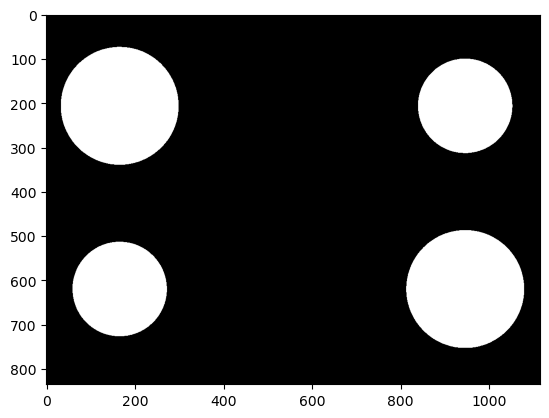

In [3]:

circulo_hsv = cv2.cvtColor(circulo, cv2.COLOR_BGR2HSV)

circulo_hsv_lower = np.array([0, 50, 100])
circulo_hsv_higher = np.array([100, 255, 255])


mask_hsv = cv2.inRange(circulo_hsv, circulo_hsv_lower, circulo_hsv_higher)

plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

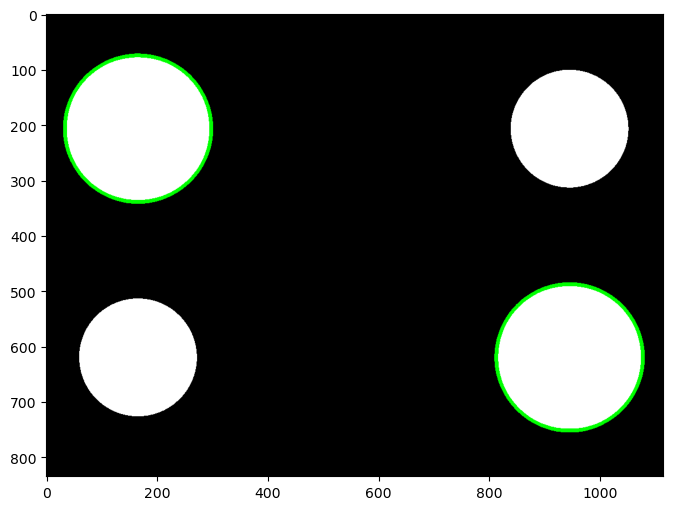

In [4]:
circulo, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
circulo_img = mask_rgb.copy()

cv2.drawContours(circulo_img, circulo, 1, [0, 255, 0], 5);
cv2.drawContours(circulo_img, circulo, 3, [0, 255, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(circulo_img);
plt.show()

In [5]:
cnt1 = circulo[3]
cnt = circulo[1]

M = cv2.moments(cnt)
M1 = cv2.moments(cnt1)

print (M)
print (M1)

{'m00': 55095.0, 'm10': 52105194.0, 'm01': 34166726.5, 'm20': 49519378681.166664, 'm11': 32312518759.25, 'm02': 21429592969.0, 'm30': 47289392689844.0, 'm21': 30708853143849.75, 'm12': 20266559457923.082, 'm03': 13588758688165.25, 'mu20': 241744743.82868195, 'mu11': -103304.95620727539, 'mu02': 241368997.20941544, 'mu30': -1020892.015625, 'mu21': -697692.7378234863, 'mu12': 971555.6920471191, 'mu03': 742714.43359375, 'nu20': 0.07964025929445118, 'nu11': -3.403272959919971e-05, 'nu02': 0.079516473528881, 'nu30': -1.432845416330278e-06, 'nu21': -9.79227798921796e-07, 'nu12': 1.363600751845488e-06, 'nu03': 1.0424167840764556e-06}
{'m00': 55067.0, 'm10': 9135873.0, 'm01': 11383915.5, 'm20': 1756938091.8333333, 'm11': 1888568920.75, 'm02': 2594748172.333333, 'm30': 371539114257.5, 'm21': 363183904776.9167, 'm12': 430444918997.0833, 'm03': 636203861562.75, 'mu20': 241254007.4973607, 'mu11': -75934.62130236626, 'mu02': 241368977.6951604, 'mu30': 4525078.399291992, 'mu21': 13915.804473876953, 

In [6]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx1 = int(M1['m10']/M1['m00'])
cy1 = int(M1['m01']/M1['m00'])
print("centro de massa na posição: ",cx, cy)
print("centro de massa na posição: ",cx1, cy1)

centro de massa na posição:  945 620
centro de massa na posição:  165 206


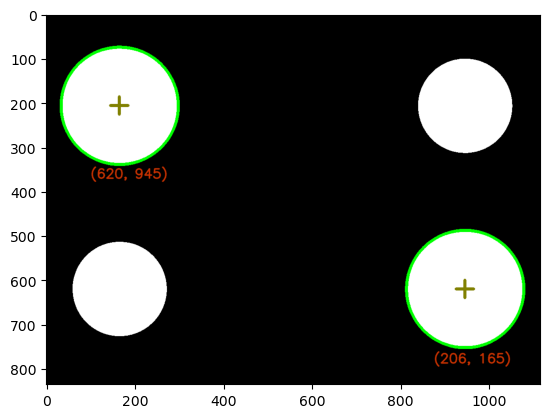

In [7]:
size = 20
color = (128,128,0)
esp = 5


area = cv2.contourArea(cnt)
area1 = cv2.contourArea(cnt1)

cv2.line(circulo_img,(cx - size,cy),(cx + size,cy),color,esp)
cv2.line(circulo_img,(cx,cy - size),(cx, cy + size),color,esp)

cv2.line(circulo_img,(cx1 - size,cy1),(cx1 + size,cy1),color,esp)
cv2.line(circulo_img,(cx1,cy1 - size),(cx1, cy1 + size),color,esp)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
text1 = cy1 , cx1
origem = (100,370)
origem1 = (875,787)

cv2.putText(circulo_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(circulo_img, str(text1), origem1, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(circulo_img);
plt.show()